In [1]:
import pandas as pd
import numpy as np
from bayesian_calibration import BayesianCalibration

 # Use default_rng() for reproducibility (with seed 1 as per your setup)
rg = np.random.default_rng(1)

### Investiagting effect of different datatypes on calibration 

In [7]:
# Import Data and Emulators
n_samples = 5000
n_params = 9

# Data
input_file = pd.read_csv(f"../Emulation/Input/input_{n_samples}_{n_params}params.csv")
full_output = pd.read_csv(f"../Emulation/Outputs/Output_{n_samples}_{n_params}params/full_output.csv")

# emulators
emulators = pd.read_pickle(f"../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}.csv")
emulators

# Direcotry for saving results
output_dir = f"../Results/{n_samples}_{n_params}params"

# Make directory if it doesn't exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [3]:
input_file

,# pat.r,pat.c,rv.E_pas,rv.E_act,rv.k_pas,T,sas.r,sas.c,sas.l,sas.v_ref,...,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v
0,0.418681,5.439191,0.578021,1.623082,0.012798,0.713993,0.003,0.08,0.000062,0.0,...,0.064259,0.064259,0.321297,0.321297,0.910988,18.219767,233.440764,2.049724,61.937993,233.440764
1,0.304988,2.423713,0.766824,2.309340,0.021832,0.547891,0.003,0.08,0.000062,0.0,...,0.049310,0.049310,0.246551,0.246551,0.971652,19.433036,248.985769,2.186217,29.437558,248.985769
2,0.223507,4.749015,0.466143,0.709211,0.026501,0.443918,0.003,0.08,0.000062,0.0,...,0.039953,0.039953,0.199763,0.199763,0.924195,18.483894,236.824895,2.079438,54.862683,236.824895
3,0.342626,3.603849,0.864309,2.875094,0.018095,0.872524,0.003,0.08,0.000062,0.0,...,0.078527,0.078527,0.392636,0.392636,0.946973,18.939455,242.661772,2.130689,42.659339,242.661772
4,0.382917,3.938686,0.704185,3.263585,0.016139,0.761778,0.003,0.08,0.000062,0.0,...,0.068560,0.068560,0.342800,0.342800,0.940197,18.803947,240.925568,2.115444,46.289277,240.925568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.340473,3.538158,0.572102,3.038544,0.012162,0.509972,0.003,0.08,0.000062,0.0,...,0.045897,0.045897,0.229487,0.229487,0.948314,18.966270,243.005339,2.133705,41.941033,243.005339
4996,0.387408,4.123019,0.412632,3.370887,0.013956,0.573132,0.003,0.08,0.000062,0.0,...,0.051582,0.051582,0.257909,0.257909,0.936509,18.730171,239.980322,2.107144,48.265533,239.980322
4997,0.190797,3.219528,0.935772,1.291345,0.020469,0.687008,0.003,0.08,0.000062,0.0,...,0.061831,0.061831,0.309154,0.309154,0.954871,19.097418,244.685666,2.148460,38.427920,244.685666
4998,0.269743,4.813311,0.637052,2.532827,0.025180,0.865363,0.003,0.08,0.000062,0.0,...,0.077883,0.077883,0.389413,0.389413,0.922948,18.458966,236.505496,2.076634,55.530461,236.505496


### Summary Stats of Waveform


/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


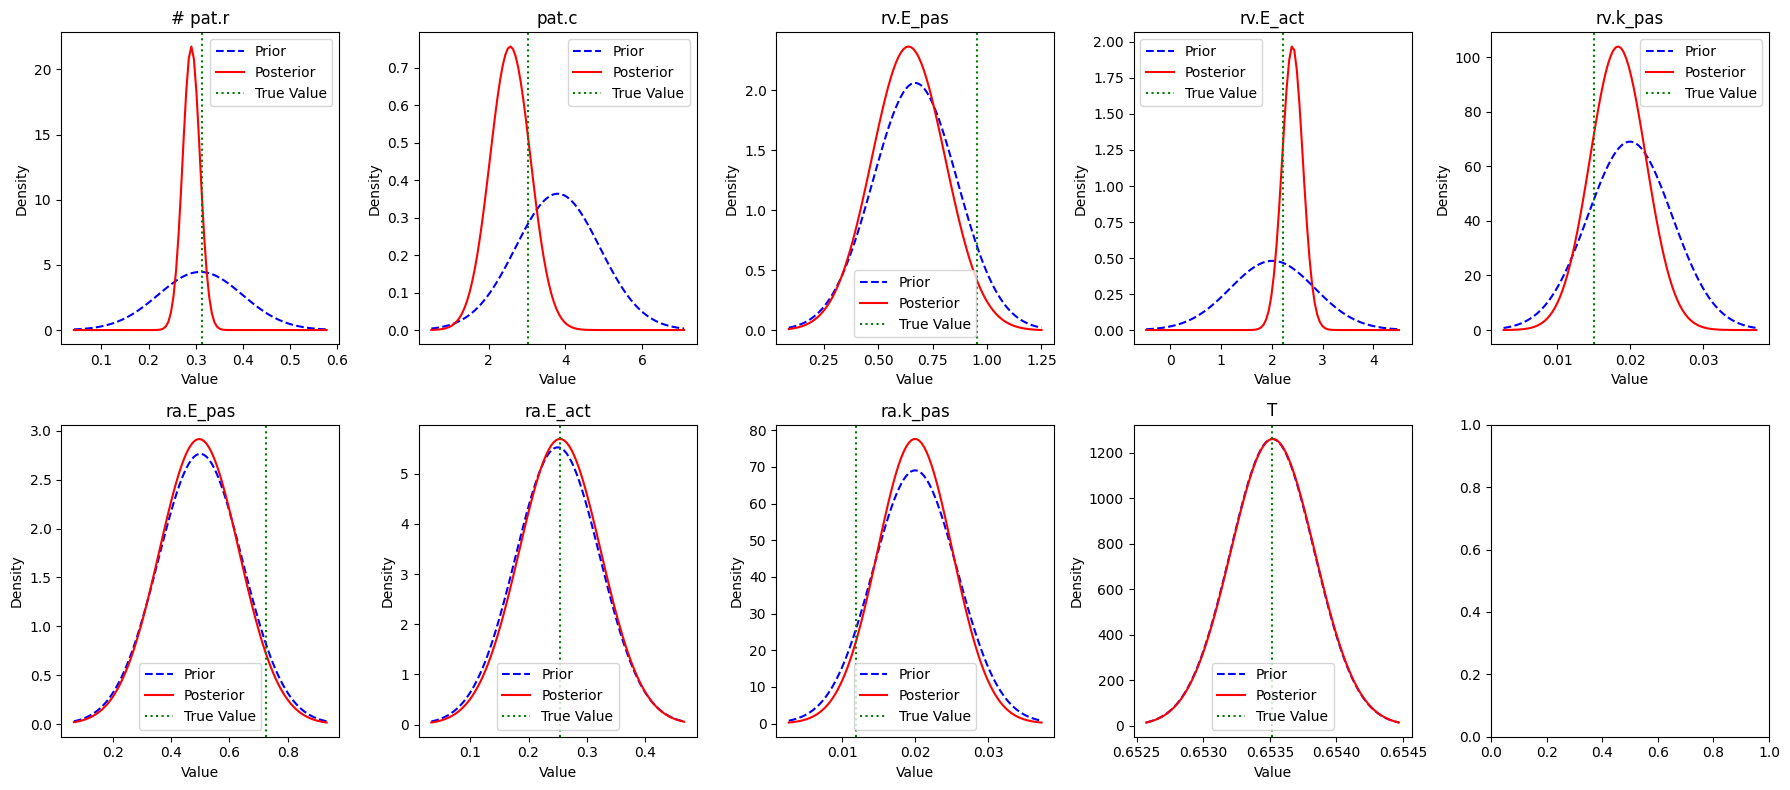

In [ ]:
output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                         'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']
selected_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]


bc_summary = BayesianCalibration(input_file, selected_output, filtered_output, which_obs=3, epsilon_obs_scale=0.05, epsilon_alt=None)

bc_summary.compute_posterior()
bc_summary.plot_distributions()

bc_summary.sample_posterior(n_samples=100)
bc_summary.samples_df.to_csv(f"{output_dir}/posterior_samples_summarystats.csv", index=False)


### Waveform Only

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


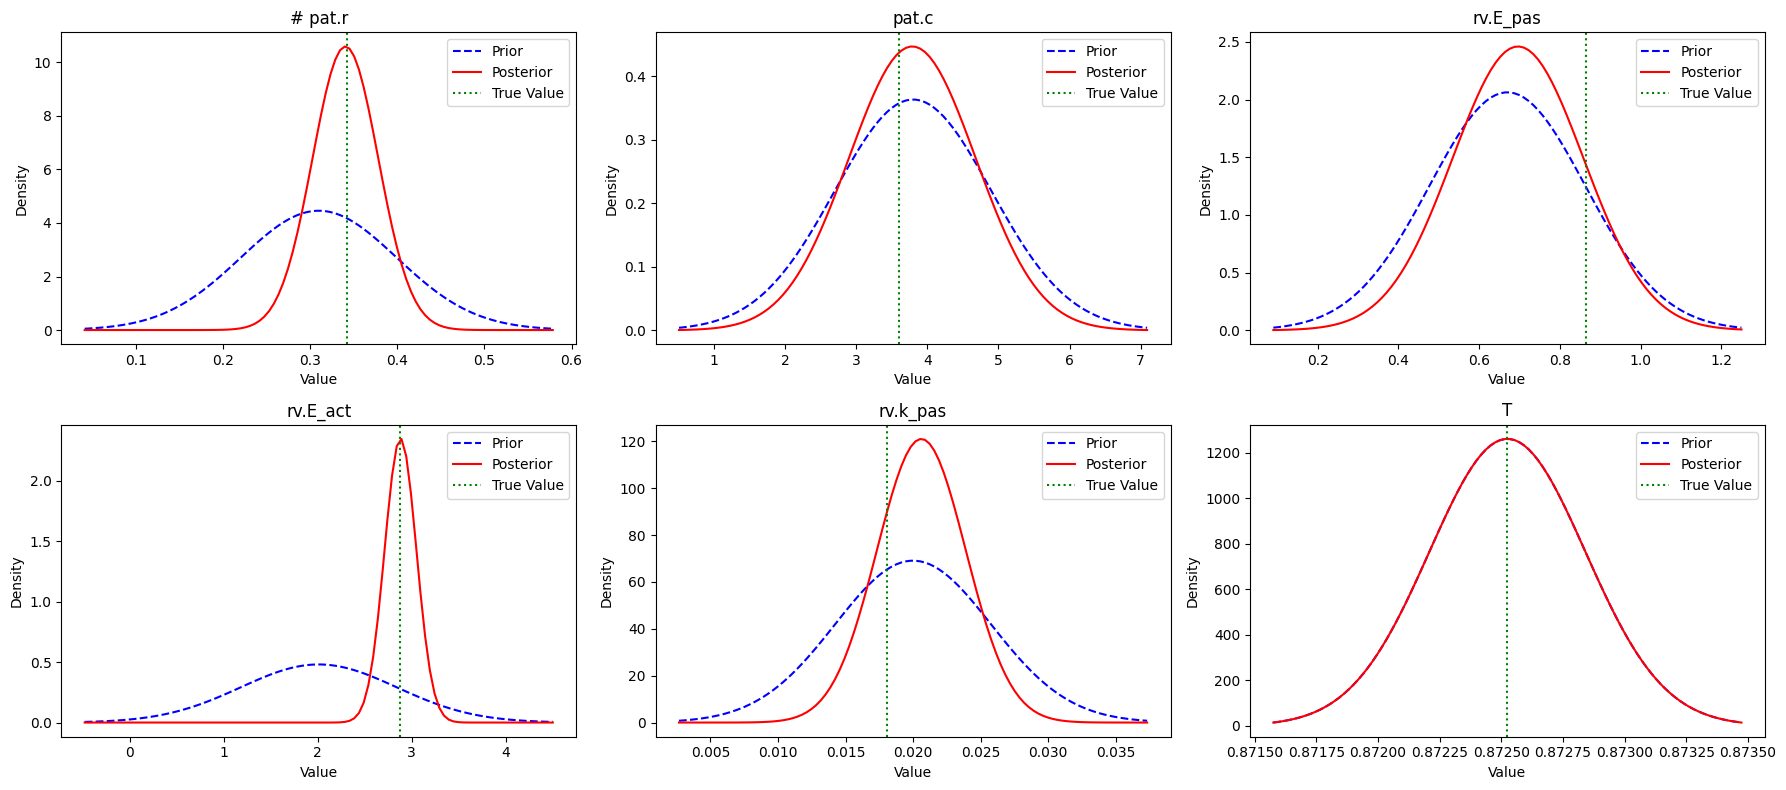

In [4]:

output_keys = full_output.iloc[:,:101].columns
selected_output= emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

obs_error = np.max(np.std(filtered_output))
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
e_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix


bc_wave = BayesianCalibration(input_file, selected_output, filtered_output, which_obs=3, epsilon_alt=e_obs)
bc_wave.compute_posterior()
bc_wave.plot_distributions()


bc_wave.sample_posterior(n_samples=100)
bc_wave.samples_df.to_csv(f"{output_dir}/posterior_samples_waveform.csv", index=False)


### Waveform plus summaries

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


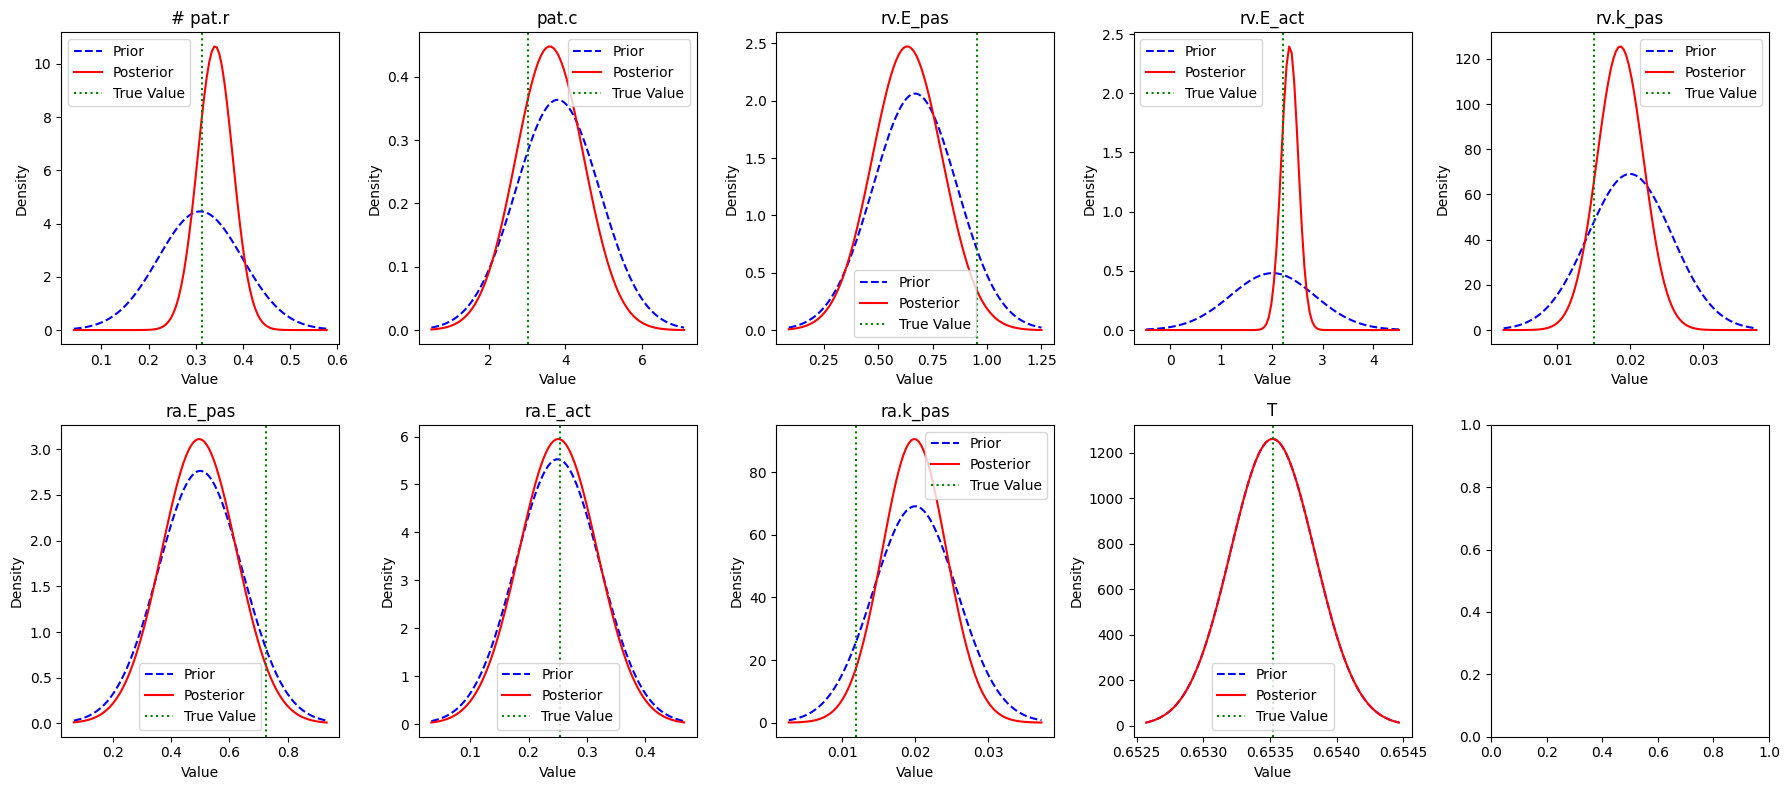

In [ ]:

output_keys = full_output.iloc[:,:101].columns
selected_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]


bc_plus = BayesianCalibration(input_file, selected_output, filtered_output, which_obs=3)
bc_plus.compute_posterior()
bc_plus.plot_distributions()


bc_plus.sample_posterior(n_samples=100)
bc_plus.samples_df.to_csv(f"{output_dir}/posterior_samples_waveplus.csv", index=False)

### PCA data only

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


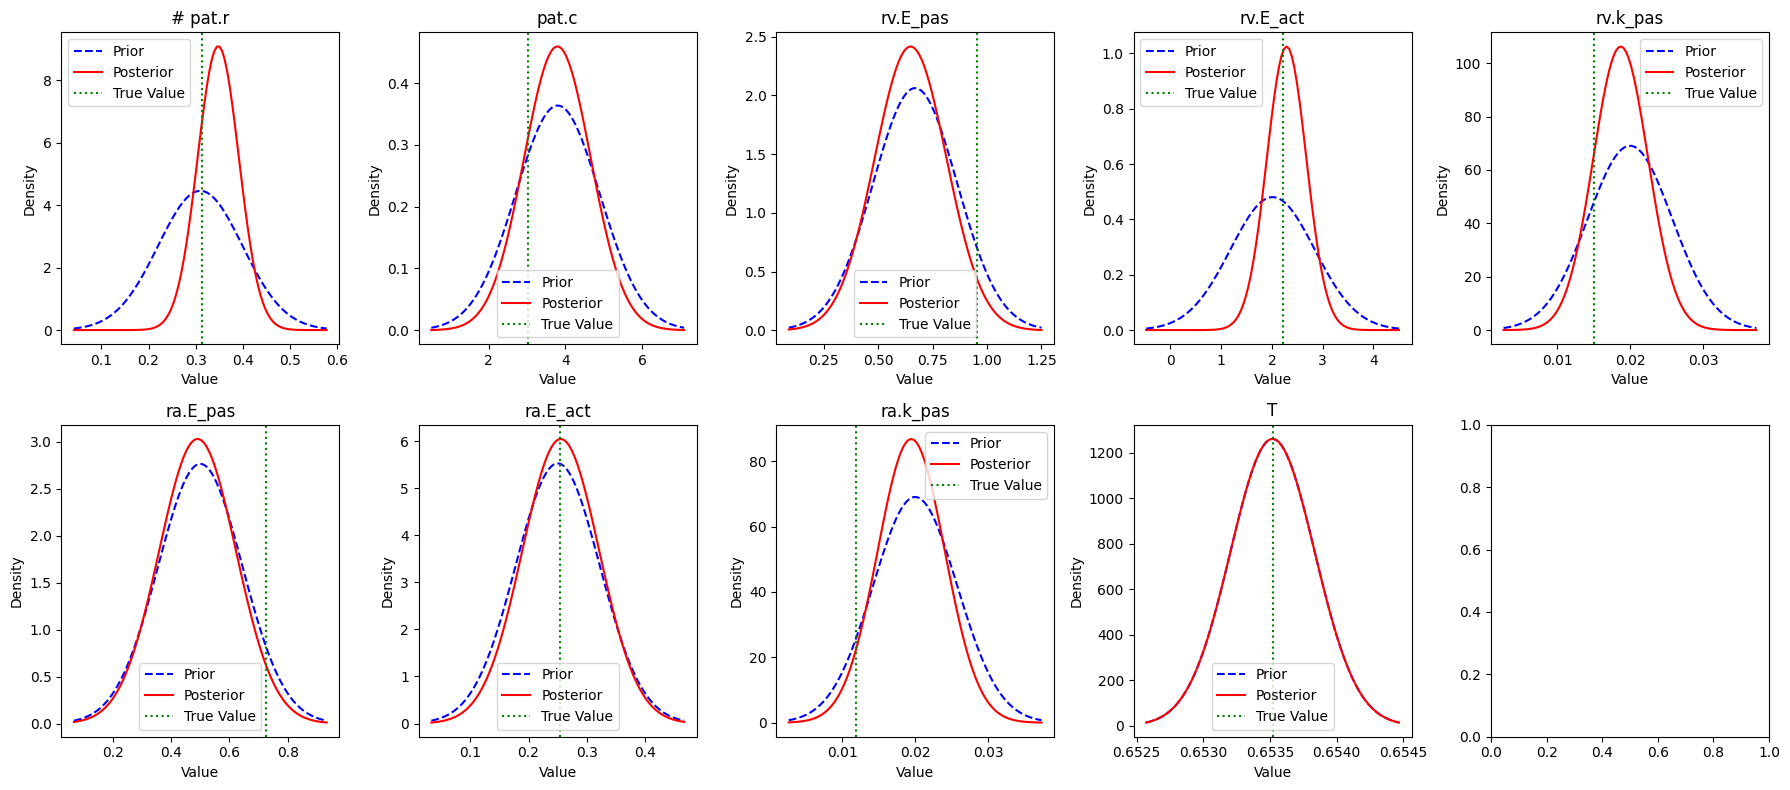

In [6]:
output_keys = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
selected_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_pca = BayesianCalibration(input_file, selected_output, filtered_output, which_obs=3, epsilon_obs_scale=0.05, epsilon_alt=None)

bc_pca.compute_posterior()
bc_pca.plot_distributions()


bc_pca.sample_posterior(n_samples=100)
bc_pca.samples_df.to_csv(f"{output_dir}/posterior_samples_pca.csv", index=False)

### PCA 1,2,3

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


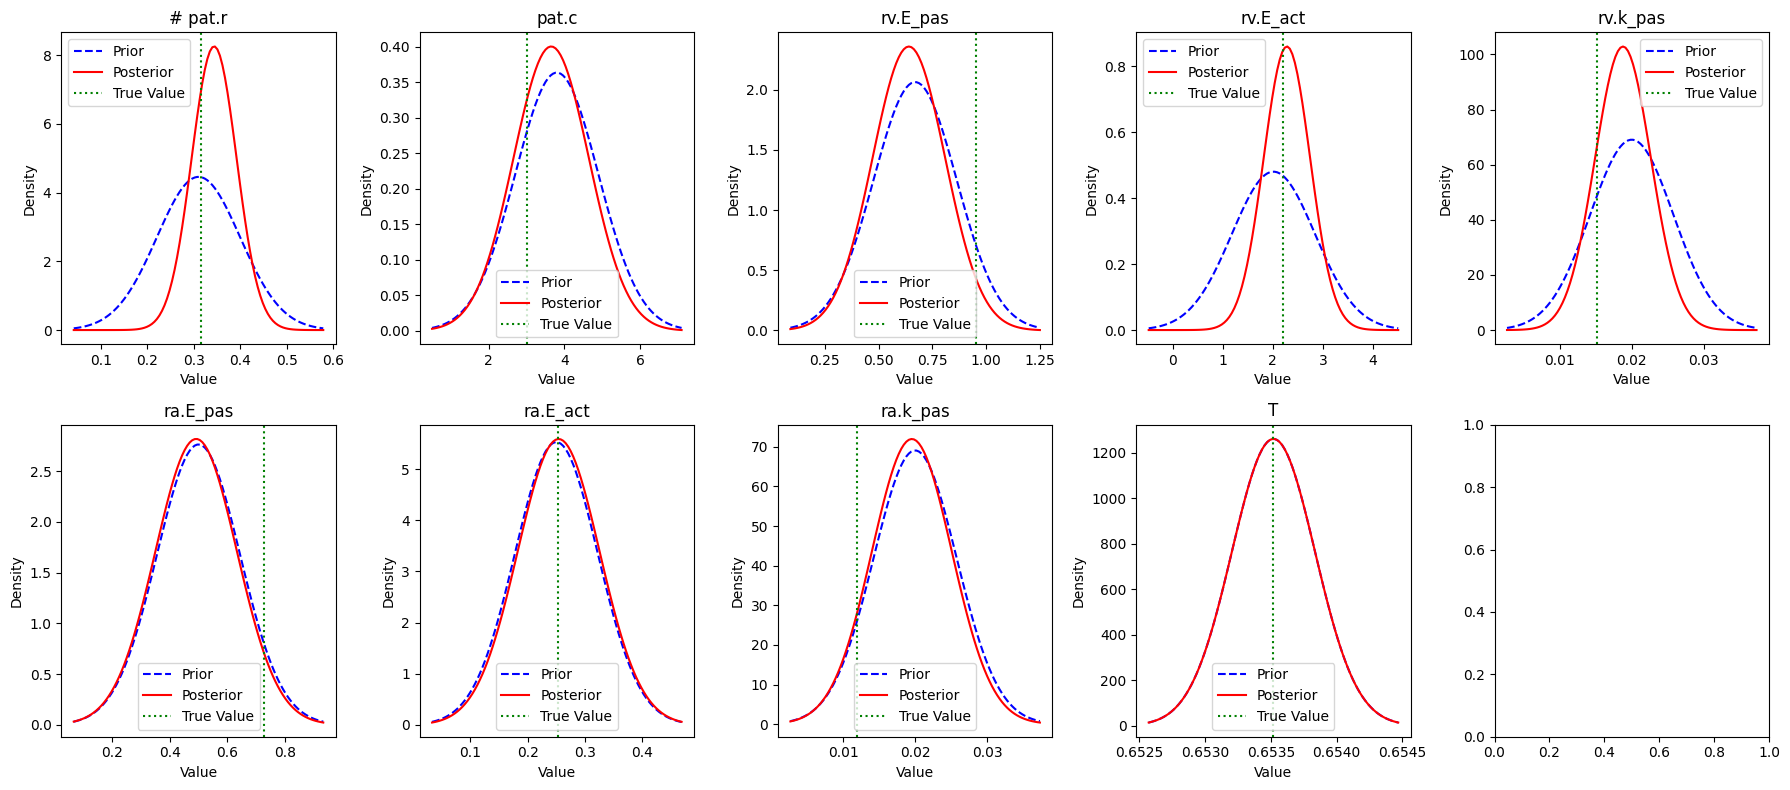

In [ ]:
output_keys = ['PC1', 'PC2', 'PC3']
selected_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_pca1 = BayesianCalibration(input_file, selected_output, filtered_output, which_obs=3)

bc_pca1.compute_posterior()
bc_pca1.plot_distributions()


bc_pca1.sample_posterior(n_samples=100)
bc_pca1.samples_df.to_csv(f"{output_dir}/posterior_samples_pca_123.csv", index=False)

### Outputs where enmulator error is lowest

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


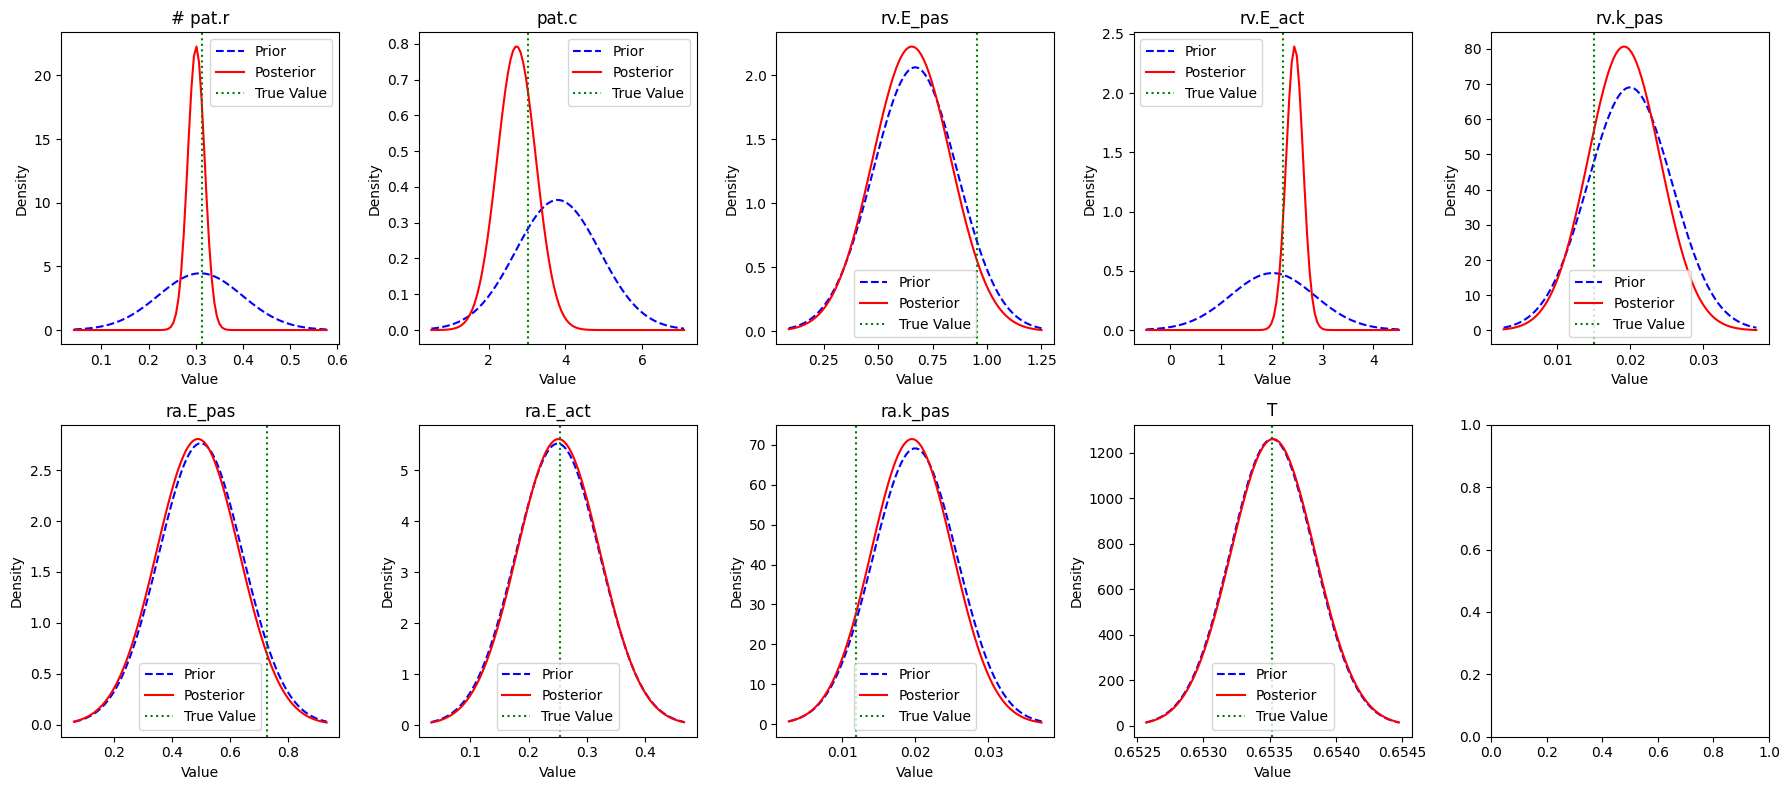

In [8]:
best_emulators = emulators.iloc[101:,:]['R2_Score'] > 0.9
output_keys = best_emulators[best_emulators].index

selected_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_best = BayesianCalibration(input_file, selected_output, filtered_output, which_obs=3)

bc_best.compute_posterior()
bc_best.plot_distributions()


bc_best.sample_posterior(n_samples=100)
bc_best.samples_df.to_csv(f"{output_dir}/posterior_samples_bestem.csv", index=False)

In [51]:
best_emulators


a_epad_ind    False
epad_ind      False
dia_ind       False
sys_ind       False
esp_ind       False
t_max_dpdt     True
a_epad         True
epad           True
s_a_epad       True
s_epad        False
min_dpdt       True
max_dpdt       True
a_alpha        True
b_alpha        True
a_beta         True
b_beta         True
cross_ind      True
cross_max      True
A_p            True
P_max          True
esp            True
sys            True
EF             True
dia           False
tau            True
Ees/Ea         True
iT             True
iHR            True
CO             True
PC1           False
PC2            True
PC3           False
PC4           False
PC5           False
PC6           False
PC7           False
PC8           False
PC9           False
PC10          False
Name: R2_Score, dtype: bool

## Reconstruct pressure waveform

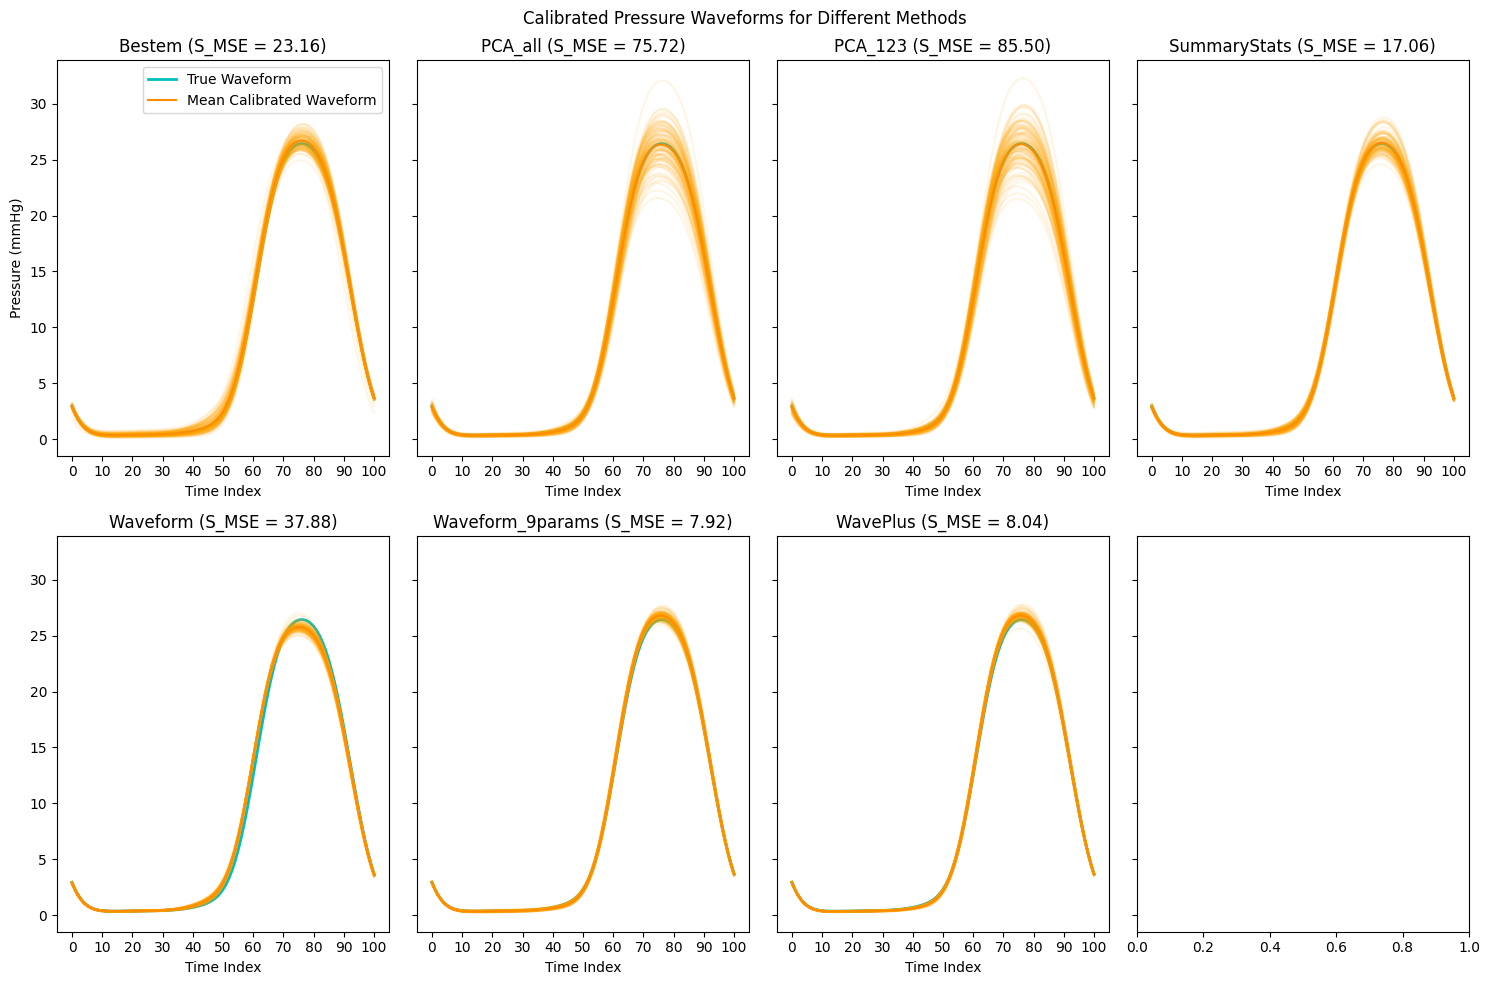

In [11]:
import matplotlib.pyplot as plt
# Load DataFrames

summarystats = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/summarystats_resampled_all_pressure_traces_rv.csv")
bestem = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/bestem_resampled_all_pressure_traces_rv.csv")
PCA_all = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/pca_resampled_all_pressure_traces_rv.csv")
PCA_123 = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/pca_123_resampled_all_pressure_traces_rv.csv")
waveform= pd.read_csv(f"../Results/{n_samples}_6params/Posterior_Simulations/Resampled_Posterior/waveform_resampled_all_pressure_traces_rv.csv")
waveplus = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/waveplus_resampled_all_pressure_traces_rv.csv")

waveform_9params = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/waveform_resampled_all_pressure_traces_rv.csv")

datasets = {"Bestem": bestem, "PCA_all": PCA_all, "PCA_123": PCA_123, "SummaryStats": summarystats, "Waveform": waveform, "Waveform_9params": waveform_9params, "WavePlus": waveplus}


# Ground truth waveform
which_obs = 3
y_true = pd.Series(full_output.iloc[which_obs, :101].values)


fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, (name, df) in enumerate(datasets.items()):
    ax = axes[i]  # Assign the correct axis
    sqe = (df.iloc[:, :101] - y_true.values) ** 2
    sse = sqe.mean(axis=0)
    sum_mse = sse.sum(axis=0)
    
    # Plot y_true
    ax.plot(y_true.values, label="True Waveform", color='c', linewidth=2)
    
    # Plot all waveforms in faded orange
    for j in range(100):
        ax.plot(df.iloc[j, :101].values, color='orange', alpha=0.1)
    
    # Compute and plot the mean waveform
    mean_waveform = df.iloc[:, :101].mean(axis=0)
    ax.plot(mean_waveform.values, color='darkorange', linewidth=1.5, label="Mean Calibrated Waveform")
    
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_xlabel("Time Index")
    ax.set_title(f"{name} (S_MSE = {sum_mse:.2f})")
    
axes[0].set_ylabel("Pressure (mmHg)")
axes[0].legend()

plt.suptitle("Calibrated Pressure Waveforms for Different Methods")
plt.tight_layout()
plt.show()
